In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [2]:
def plot_dendrogram(model, **kwargs):
  #linkage matrix --> dendrogram
  #count of samples under each node
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx<n_samples:
        current_count +=1 # leaf node
      else:
        current_count +=counts[child_idx-n_samples]
    counts[i] = current_count
  linkage_matrix = np.column_stack(
      [model.children_, model.distances_, counts]
  ).astype(float)

  dendrogram(linkage_matrix, **kwargs)

In [3]:
iris = load_iris()

In [4]:
X = iris.data

In [5]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [6]:
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

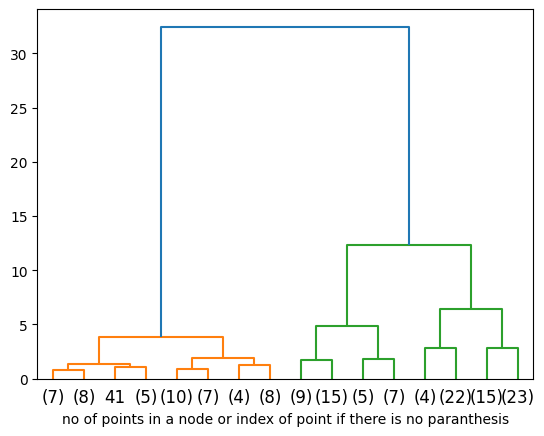

In [7]:
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel('no of points in a node or index of point if there is no paranthesis')
plt.show()